In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../data/Advertising.csv", index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA - Exploratory data analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [12]:
df.shape # 200 samples, 3 features, 1 label

(200, 4)

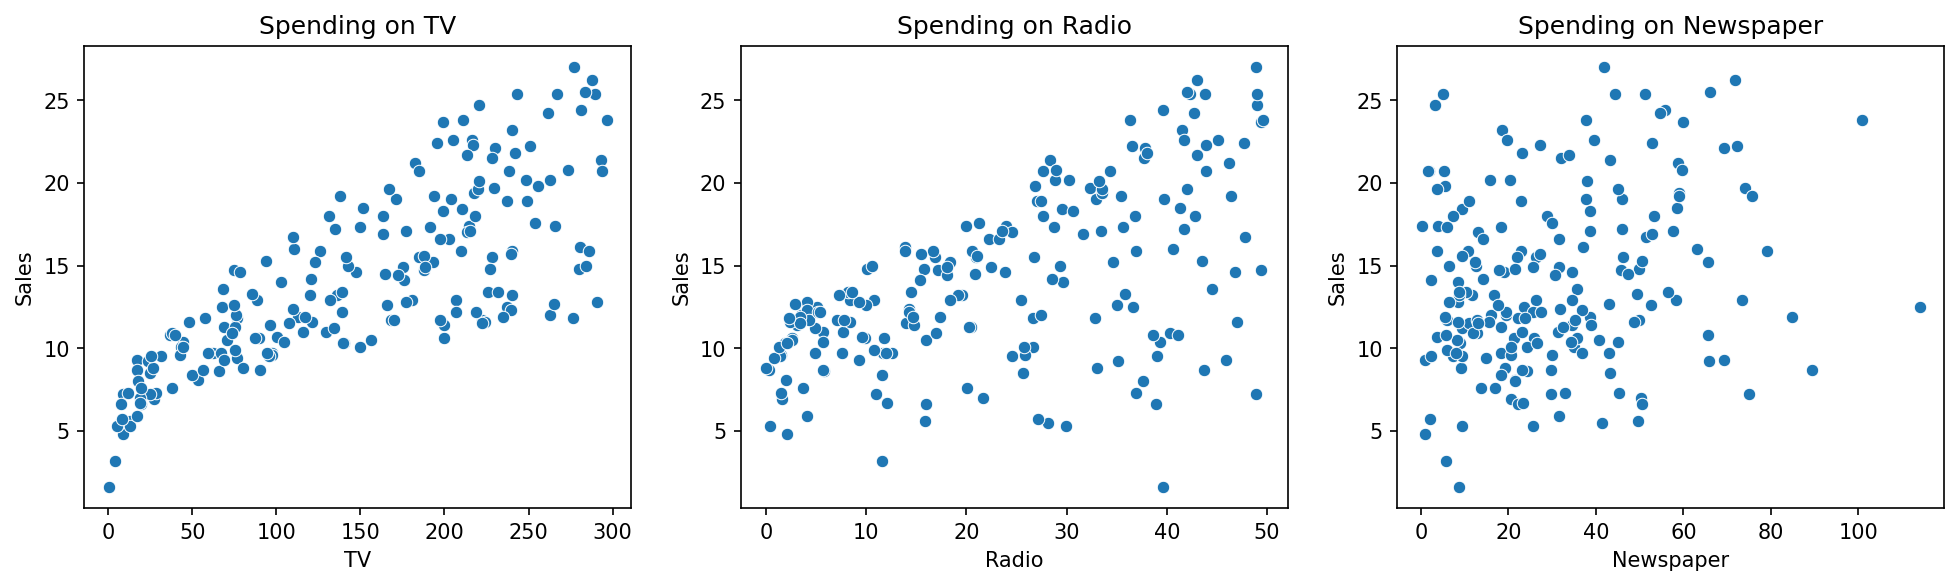

In [21]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize=(16,4), dpi=150)


for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x = feature, y="Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

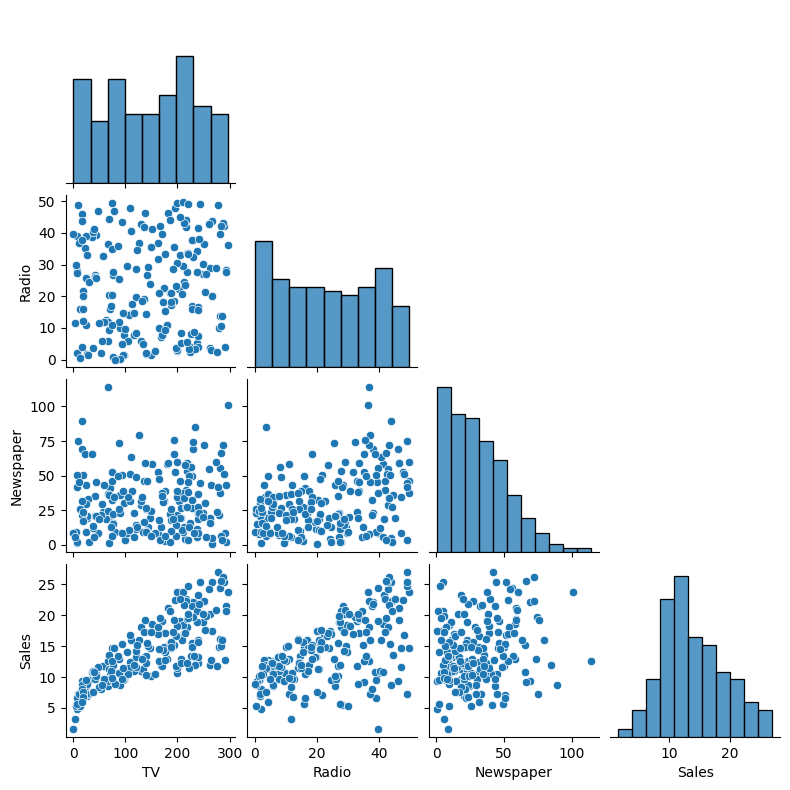

In [24]:
ax = sns.pairplot(data=df, height=2, corner=True)

## Simple linear regression

In [28]:
x, y = df["TV"], df["Sales"]
x, y

(1      230.1
 2       44.5
 3       17.2
 4      151.5
 5      180.8
        ...  
 196     38.2
 197     94.2
 198    177.0
 199    283.6
 200    232.1
 Name: TV, Length: 200, dtype: float64,
 1      22.1
 2      10.4
 3       9.3
 4      18.5
 5      12.9
        ... 
 196     7.6
 197     9.7
 198    12.8
 199    25.5
 200    13.4
 Name: Sales, Length: 200, dtype: float64)

In [30]:
beta_1, beta_0 = np.polyfit(x,y, deg=1)
beta_0, beta_1

(7.032593549127696, 0.04753664043301972)

Text(0.5, 1.0, 'Regression line on tv advertisement and sales')

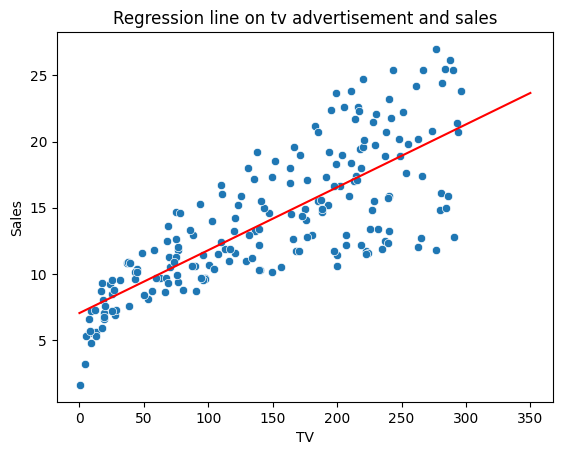

In [39]:
y_hat = lambda x: beta_0 + beta_1*x

spending = np.linspace(0, 350)

ax = sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spending, y=y_hat(spending), color="red")
ax.set_title(label="Regression line on tv advertisement and sales")

<AxesSubplot: xlabel='TV', ylabel='Sales'>

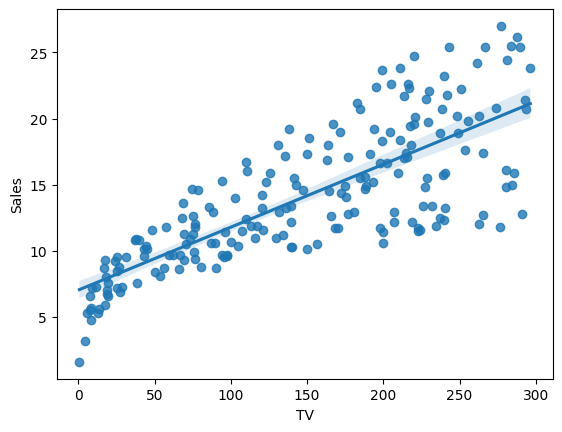

In [40]:
sns.regplot(x=x, y=y)

## Multiple linear regression

In [42]:
x, y = df.drop("Sales", axis="columns"), df["Sales"]
x, y

(        TV  Radio  Newspaper
 1    230.1   37.8       69.2
 2     44.5   39.3       45.1
 3     17.2   45.9       69.3
 4    151.5   41.3       58.5
 5    180.8   10.8       58.4
 ..     ...    ...        ...
 196   38.2    3.7       13.8
 197   94.2    4.9        8.1
 198  177.0    9.3        6.4
 199  283.6   42.0       66.2
 200  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 1      22.1
 2      10.4
 3       9.3
 4      18.5
 5      12.9
        ... 
 196     7.6
 197     9.7
 198    12.8
 199    25.5
 200    13.4
 Name: Sales, Length: 200, dtype: float64)

In [43]:
x.insert(0, "Intercept", 1)
x

,Intercept,TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4
...,...,...,...,...
196,1,38.2,3.7,13.8
197,1,94.2,4.9,8.1
198,1,177.0,9.3,6.4
199,1,283.6,42.0,66.2


In [50]:
# @ operator - matmul operator
# in numpy - the matmul operator is operator overloaded to handle matrix multiplication

x.T@x

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [53]:
beta_hat = np.linalg.inv(x.T@x) @ x.T @ y
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [54]:
regression_fit = lambda x, y: np.linalg.inv(x.T@x) @ x.T @ y
beta_hat = regression_fit(x, y)
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [58]:
predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230, 38, 69]
y_hat = predict(test_sample, beta_hat)

print(f" With 230k$ on tv, 38k$ on radio and 69k$ on newspaper we get predicted sales on {y_hat:.1f}k units")

 With 230k$ on tv, 38k$ on radio and 69k$ on newspaper we get predicted sales on 20.6k units


## Train|test split

In [60]:
train_fraction = len(df)*0.7

train_fraction

140.0